In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data=pd.read_csv("EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Hierarchial Clustering

In [3]:
def std_func(i):
    x=(i-i.mean())/i.std()
    return(x)

In [4]:
df_std=std_func(data.iloc[:,1:])
df_std.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755


In [5]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [6]:
y_hc = hc.fit_predict(df_std)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [7]:
data['h_clusterid']=pd.Series(y_hc)
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [8]:
data.iloc[:,1:].groupby("h_clusterid").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,
0,68105.429656,142.463057,2.043016,1.014676,1.000759,16511.953441,11.412955,433.876518,1.294281,4099.368674,0.365638
1,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


In [9]:
data.iloc[:,1:].sort_values("h_clusterid").mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
h_clusterid              0.017504
dtype: float64

In [10]:
df_std.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,6.948958e-17,2.492380e-16,-8.832867e-15,-3.341774e-16,6.892947e-16,-1.364972e-15,1.126492e-15,2.238353e-16,1.806743e-15,-2.001733e-15,1.836213e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.303482e-01,-1.862754e-01,-7.694822e-01,-9.822960e-02,-6.275873e-02,-7.099031e-01,-1.208052e+00,-3.285622e-01,-3.621226e-01,-1.993361e+00,-7.668234e-01
25%,-5.464993e-01,-1.862754e-01,-7.694822e-01,-9.822960e-02,-6.275873e-02,-6.581453e-01,-8.956758e-01,-3.285622e-01,-3.621226e-01,-8.660740e-01,-7.668234e-01
50%,-3.026954e-01,-1.862754e-01,-7.694822e-01,-9.822960e-02,-6.275873e-02,-4.129792e-01,4.145225e-02,-3.285622e-01,-3.621226e-01,-1.092393e-02,-7.668234e-01
75%,1.865795e-01,-1.862754e-01,6.830357e-01,-9.822960e-02,-6.275873e-02,2.755854e-01,5.620789e-01,-1.064525e-01,-9.849101e-02,8.096037e-01,1.303755e+00
max,1.618681e+01,1.422308e+01,2.135554e+00,1.344729e+01,2.042477e+01,1.020829e+01,7.746727e+00,2.168029e+01,1.361035e+01,2.022842e+00,1.303755e+00


### K-Means Clustering

In [11]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df_std)

KMeans(n_clusters=3)

In [12]:
data["labels"]=kmeans.labels_

In [13]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


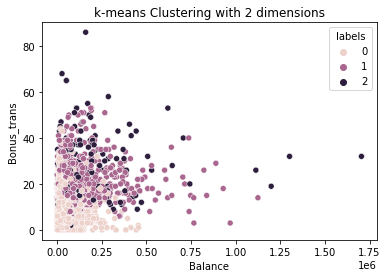

In [14]:
sns.scatterplot(x="Balance",y="Bonus_trans",hue=data["labels"],data=data)
plt.title('k-means Clustering with 2 dimensions')
plt.show()

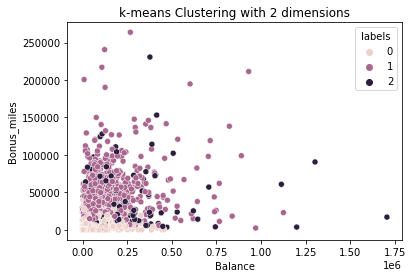

In [15]:
sns.scatterplot(x="Balance",y="Bonus_miles",hue=data["labels"],data=data)
plt.title('k-means Clustering with 2 dimensions')
plt.show()

In [16]:
kmeans.cluster_centers_

array([[-0.29013566, -0.06130756, -0.59679143,  0.03050016, -0.06077197,
        -0.50942171, -0.47731651, -0.18545072, -0.19727616, -0.19964983,
        -0.34274836],
       [ 0.43761533,  0.01796105,  1.21516344, -0.08206549,  0.13282622,
         0.96787902,  0.7698326 , -0.08107102, -0.0915699 ,  0.37172367,
         0.58391199],
       [ 1.20662964,  0.82606009,  0.06748699,  0.14955436, -0.06275873,
         0.58942223,  1.60269741,  3.53657463,  3.80293473,  0.28927206,
         0.91236528]])

In [17]:
k=list(range(2,15))
k
TWSS = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_std)
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(df_std.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_std.shape[1]))))
    #wcss.append(kmeans.inertia_)
    print("TWSS when k is",i,sum(WSS))
    TWSS.append(sum(WSS))

TWSS when k is 2 [9072.97906346]
TWSS when k is 3 [8584.44068648]
TWSS when k is 4 [8390.18104522]
TWSS when k is 5 [7761.85714408]
TWSS when k is 6 [7587.09811883]
TWSS when k is 7 [7034.96064404]
TWSS when k is 8 [6801.41131407]
TWSS when k is 9 [6700.85697046]
TWSS when k is 10 [6211.00270844]
TWSS when k is 11 [6069.99511079]
TWSS when k is 12 [5872.54814534]
TWSS when k is 13 [5682.82179724]
TWSS when k is 14 [5629.73684754]


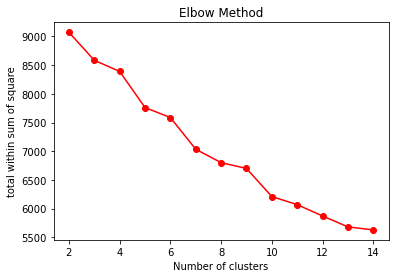

In [18]:
plt.plot(k,TWSS,'ro-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('total within sum of square')
plt.show()

### DBSCAN

In [19]:
array=data.values
array

array([[    1, 28143,     0, ...,     0,     0,     0],
       [    2, 19244,     0, ...,     0,     0,     0],
       [    3, 41354,     0, ...,     0,     0,     0],
       ...,
       [ 4019, 73597,     0, ...,     1,     0,     1],
       [ 4020, 54899,     0, ...,     0,     0,     0],
       [ 4021,  3016,     0, ...,     0,     0,     0]], dtype=int64)

In [20]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [21]:
dbscan = DBSCAN(eps=2.5, min_samples=16)
dbscan.fit(X)

DBSCAN(eps=2.5, min_samples=16)

In [22]:
(dbscan.labels_)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [24]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [25]:
clustered=pd.concat([data,cl],axis=1)

In [26]:
clustered[clustered['cluster']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,labels,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0,0


In [27]:
#outliers in the dataset
clustered[clustered['cluster']==-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,labels,cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0,2,-1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,0,2,-1
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,1,1,-1
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,0,2,-1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,0,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,0,1,-1
3897,3920,179832,2954,3,1,1,18218,20,2500,5,1569,1,0,1,-1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,0,2,-1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,0,2,-1
